# **Modelo de Predicción**

Vamos a probar varios de los modelos de ensamble a ver cual funciona mejor para nuestro problema de regresión:

In [1]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve

import pickle

import sys

import warnings
warnings.filterwarnings('ignore')


sys.path.append("../")
from src import funciones_problemas_clasificacion as fpc

pd.set_option("display.max_columns", None)


In [2]:
df = pd.read_pickle("../datos/dataframes/df_nonulls_encoded_outliers_scaled_balanced.pkl")
print(df.shape)
df.head()

(1963, 34)


,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Attrition
0,0.00000,-0.944950,1.000000,1.153846,0.000000,-1.0,-0.083333,-0.5,0.415932,-0.5,0.0,1.500456,-0.333333,-0.500000,-1.0,-1.000000,3.0,-0.666667,-0.333333,-0.6,0.0,0.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.00000,0.000000,1.041064,-0.384615,0.108443,0.0,0.250000,-1.0,0.415932,-0.5,1.0,-0.129450,-0.666667,1.500000,0.0,-0.444444,0.0,0.000000,0.000000,0.2,-1.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,0.94286,0.000000,5.255676,-0.307692,0.108443,0.0,0.833333,0.5,-6.615635,1.0,0.0,2.634654,-0.333333,0.166667,2.0,-0.555556,-1.0,0.000000,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,-0.05714,-0.944950,0.000000,0.153846,-0.069419,0.0,-0.416667,1.0,0.415932,0.5,0.0,0.624977,0.333333,-0.500000,2.0,0.333333,2.0,0.500000,2.000000,0.4,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-0.05714,1.238725,0.000000,-0.307692,0.000000,0.0,0.250000,-1.0,0.000000,-0.5,1.0,-0.466679,0.666667,-0.333333,1.0,-0.111111,-1.0,0.166667,-0.333333,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [3]:
vr="Attrition"
modelo_clasificacion = fpc.AnalisisModelosClasificacion(df, vr)

Veamos las métricas para distintos modelos y las comparamos:

### **Logistic Regression**

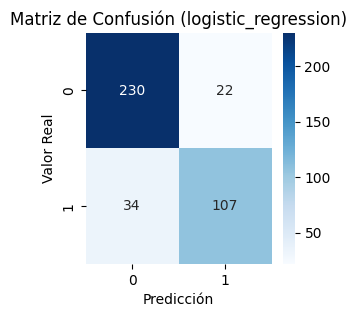

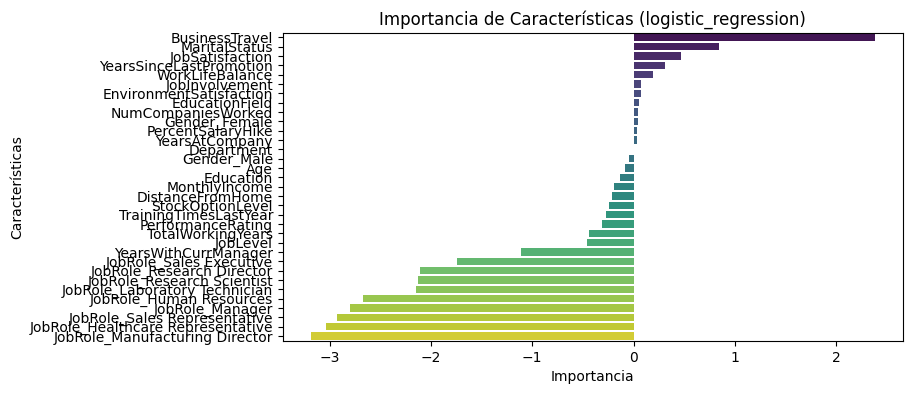

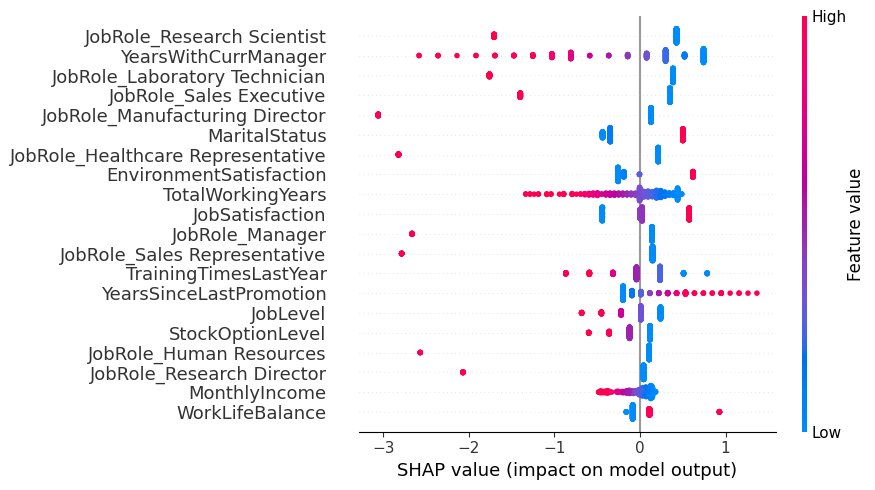

,accuracy,precision,recall,f1,kappa,auc,modelo
train,0.815924,0.815341,0.815924,0.811920,0.595559,0.878650,regresion logistica
test,0.857506,0.856231,0.857506,0.855997,0.684392,0.892266,regresion logistica


In [4]:
modelo_clasificacion.ajustar_modelo("logistic_regression")

# modelo_clasificacion.plot_matriz_confusion("logistic_regression")
# modelo_clasificacion.importancia_predictores(modelo_nombre ='logistic_regression')
# modelo_clasificacion.plot_shap_summary(modelo_nombre="logistic_regression")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = modelo_clasificacion.calcular_metricas(modelo_nombre =  "logistic_regression" )
df_resultados["modelo"] = "regresion logistica"
df_resultados

### **Decision Tree**

El mejor modelo es DecisionTreeClassifier(max_depth=7, min_samples_split=5)


,accuracy,precision,recall,f1,kappa,auc
train,0.845860,0.844977,0.845860,0.845211,0.669942,0.908224
test,0.778626,0.777650,0.778626,0.778091,0.516605,0.785250


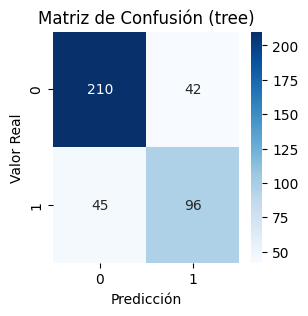

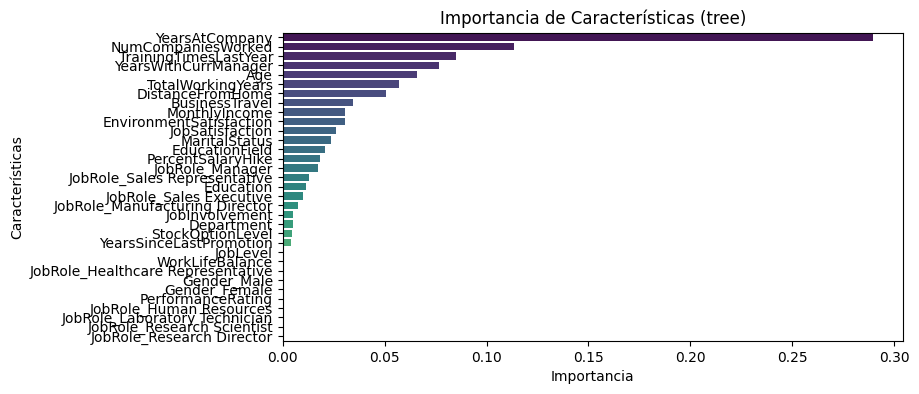

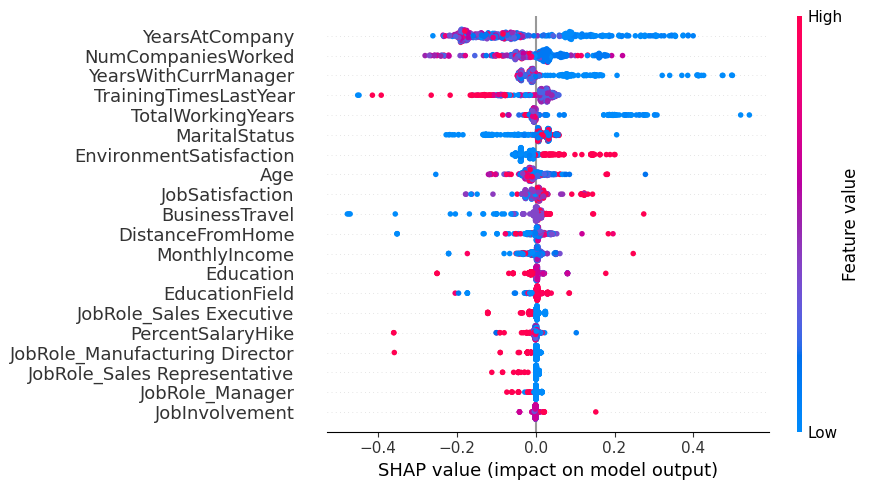

,accuracy,precision,recall,f1,kappa,auc,modelo
train,0.845860,0.844977,0.845860,0.845211,0.669942,0.908224,decision tree
test,0.778626,0.777650,0.778626,0.778091,0.516605,0.785250,decision tree
train,0.815924,0.815341,0.815924,0.811920,0.595559,0.878650,regresion logistica
test,0.857506,0.856231,0.857506,0.855997,0.684392,0.892266,regresion logistica


In [5]:
# llamamos a la función para ajustar el modelo
modelo_clasificacion.ajustar_modelo("tree")
df_resultados_tree = modelo_clasificacion.calcular_metricas(modelo_nombre =  "tree" )
display(df_resultados_tree)


# modelo_clasificacion.plot_matriz_confusion("tree")
# modelo_clasificacion.importancia_predictores(modelo_nombre ='tree')
# modelo_clasificacion.plot_shap_summary(modelo_nombre="tree")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_tree["modelo"] = "decision tree"
df_resultados_final = pd.concat([df_resultados_tree, df_resultados], axis = 0)
df_resultados_final

# **Random Forest**

El mejor modelo es RandomForestClassifier(max_depth=20, min_samples_split=5, n_jobs=-1)


,accuracy,precision,recall,f1,kappa,auc
train,0.998726,0.998729,0.998726,0.998726,0.997292,1.00000
test,0.885496,0.887276,0.885496,0.882911,0.741866,0.92525


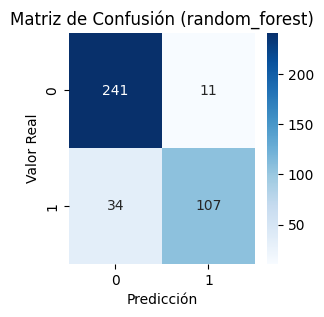

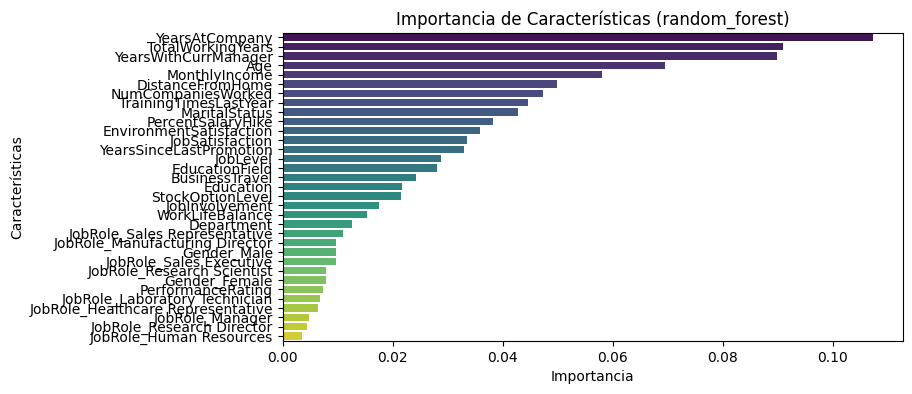

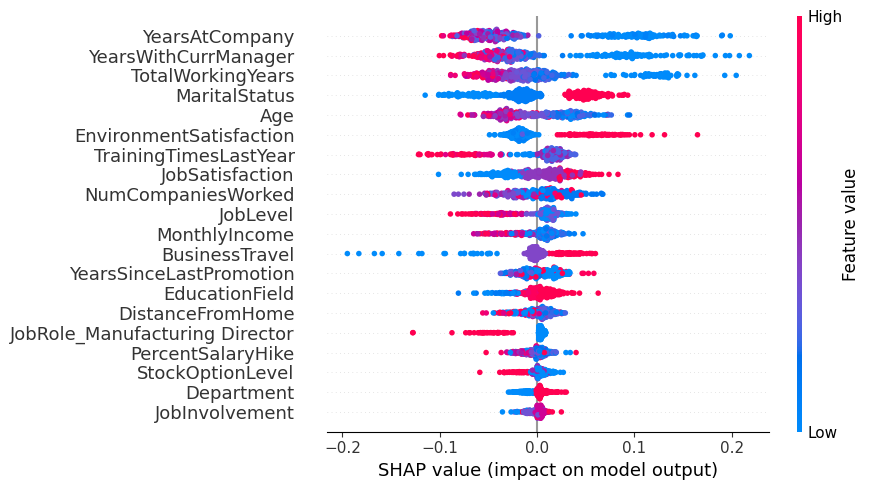

,accuracy,precision,recall,f1,kappa,auc,modelo
train,0.998726,0.998729,0.998726,0.998726,0.997292,1.000000,random forest
test,0.885496,0.887276,0.885496,0.882911,0.741866,0.925250,random forest
train,0.845860,0.844977,0.845860,0.845211,0.669942,0.908224,decision tree
test,0.778626,0.777650,0.778626,0.778091,0.516605,0.785250,decision tree
train,0.815924,0.815341,0.815924,0.811920,0.595559,0.878650,regresion logistica
test,0.857506,0.856231,0.857506,0.855997,0.684392,0.892266,regresion logistica


In [6]:
modelo_clasificacion.ajustar_modelo("random_forest")
df_resultados_random_forest = modelo_clasificacion.calcular_metricas(modelo_nombre = "random_forest")
display(df_resultados_random_forest)


# modelo_clasificacion.plot_matriz_confusion("random_forest")
# modelo_clasificacion.importancia_predictores(modelo_nombre ='random_forest')
# modelo_clasificacion.plot_shap_summary(modelo_nombre="random_forest")


df_resultados_random_forest["modelo"] = "random forest"
df_resultados_final = pd.concat([df_resultados_random_forest, df_resultados_final], axis = 0)
df_resultados_final

### **XGBoost**

In [7]:
modelo_clasificacion.ajustar_modelo("xgboost")
df_resultados_xgboost = modelo_clasificacion.calcular_metricas(modelo_nombre = "xgboost")

df_resultados_xgboost["modelo"] = "xgboost"
df_resultados_final = pd.concat([df_resultados_xgboost, df_resultados_final], axis = 0)
df_resultados_final

El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


,accuracy,precision,recall,f1,kappa,auc,modelo
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,xgboost
test,0.898219,0.897733,0.898219,0.897338,0.775281,0.928994,xgboost
train,0.998726,0.998729,0.998726,0.998726,0.997292,1.000000,random forest
test,0.885496,0.887276,0.885496,0.882911,0.741866,0.925250,random forest
train,0.845860,0.844977,0.845860,0.845211,0.669942,0.908224,decision tree
test,0.778626,0.777650,0.778626,0.778091,0.516605,0.785250,decision tree
train,0.815924,0.815341,0.815924,0.811920,0.595559,0.878650,regresion logistica
test,0.857506,0.856231,0.857506,0.855997,0.684392,0.892266,regresion logistica


Una vez hemos agrupado todas las métricas en un mismo df vamos a ponerlas distintos colores para verlas mejor y analizarlas.

### **Gradient Boosting**

In [8]:
modelo_clasificacion.ajustar_modelo("gradient_boosting")
df_resultados_gradient_boosting = modelo_clasificacion.calcular_metricas(modelo_nombre = "gradient_boosting")

df_resultados_gradient_boosting["modelo"] = "gradient boosting"
df_resultados_final = pd.concat([df_resultados_gradient_boosting, df_resultados_final], axis = 0)
df_resultados_final

El mejor modelo es GradientBoostingClassifier(learning_rate=0.2, max_depth=5, min_samples_leaf=2,
                           min_samples_split=10, n_estimators=200,
                           subsample=0.8)


,accuracy,precision,recall,f1,kappa,auc,modelo
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,gradient boosting
test,0.895674,0.895129,0.895674,0.895245,0.771476,0.935945,gradient boosting
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,xgboost
test,0.898219,0.897733,0.898219,0.897338,0.775281,0.928994,xgboost
train,0.998726,0.998729,0.998726,0.998726,0.997292,1.000000,random forest
test,0.885496,0.887276,0.885496,0.882911,0.741866,0.925250,random forest
train,0.845860,0.844977,0.845860,0.845211,0.669942,0.908224,decision tree
test,0.778626,0.777650,0.778626,0.778091,0.516605,0.785250,decision tree
train,0.815924,0.815341,0.815924,0.811920,0.595559,0.878650,regresion logistica
test,0.857506,0.856231,0.857506,0.855997,0.684392,0.892266,regresion logistica


## **Resumen:**

In [10]:
df_resultados_colores = df_resultados_final.copy()
df_resultados_colores.reset_index(inplace = True, drop = True)
df_resultados_colores = df_resultados_colores.style.apply(fpc.color_filas_con_borde, axis=1)

df_resultados_colores

,accuracy,precision,recall,f1,kappa,auc,modelo
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,gradient boosting
1,0.895674,0.895129,0.895674,0.895245,0.771476,0.935945,gradient boosting
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,xgboost
3,0.898219,0.897733,0.898219,0.897338,0.775281,0.928994,xgboost
4,0.998726,0.998729,0.998726,0.998726,0.997292,1.000000,random forest
5,0.885496,0.887276,0.885496,0.882911,0.741866,0.925250,random forest
6,0.845860,0.844977,0.845860,0.845211,0.669942,0.908224,decision tree
7,0.778626,0.777650,0.778626,0.778091,0.516605,0.785250,decision tree
8,0.815924,0.815341,0.815924,0.811920,0.595559,0.878650,regresion logistica
9,0.857506,0.856231,0.857506,0.855997,0.684392,0.892266,regresion logistica


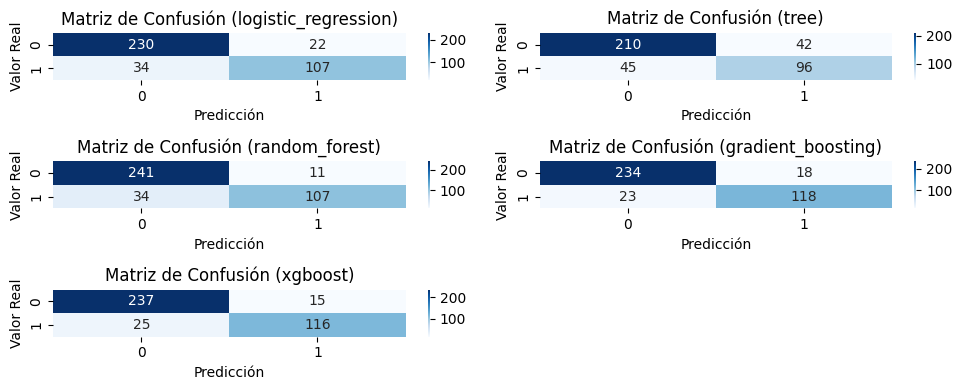

In [11]:
modelo_clasificacion.plot_all_matriz_confusion()

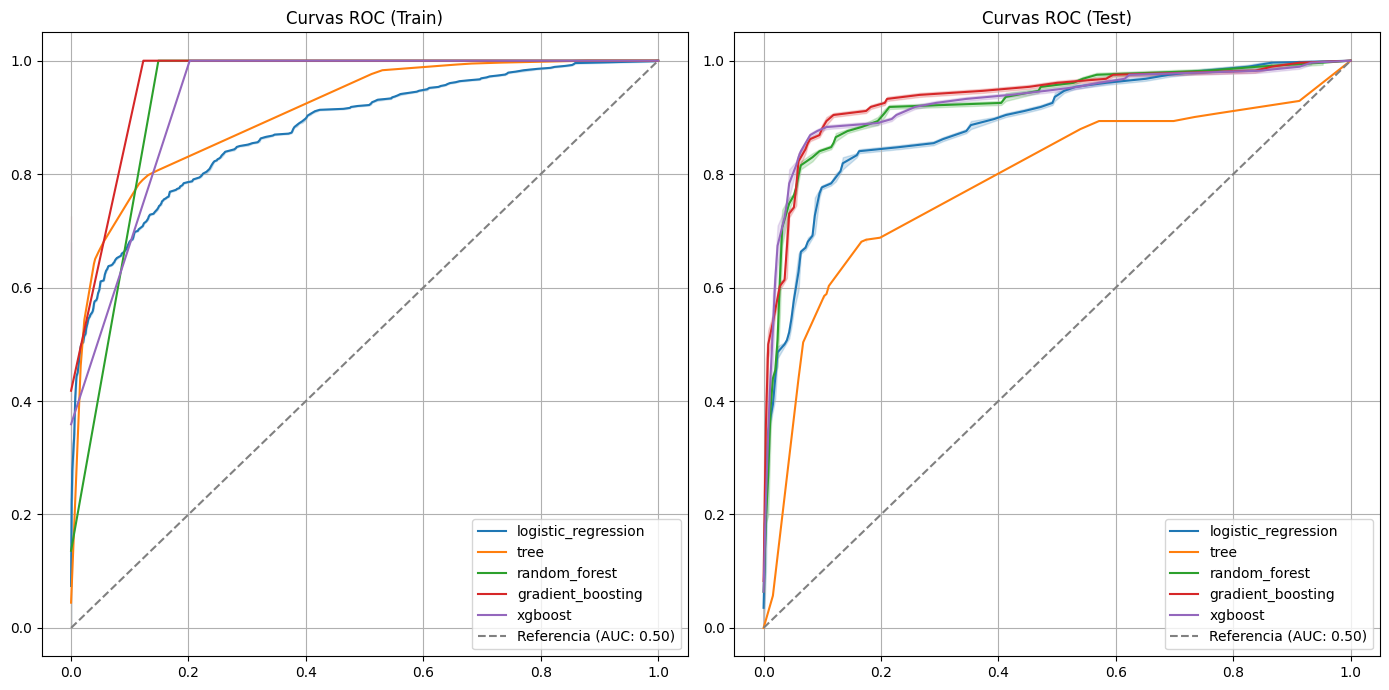

In [12]:
modelo_clasificacion.plot_curvas_roc_train_test()

### Reajuste de parámetros:

In [15]:
# Gradiente Boosting
params_gradient={
                'n_estimators': [150, 200, 250],
                'learning_rate': [0.1, 0.2, 0.3],
                'max_depth': [4, 5, 6, 7],
                'min_samples_split': [8,10,12,15],
                'min_samples_leaf': [1, 2, 3],
                'subsample': [0.8, 1.0]
            }

modelo_clasificacion.ajustar_modelo("gradient_boosting", param_grid=params_gradient)
df_resultados_gradient_boosting = modelo_clasificacion.calcular_metricas(modelo_nombre = "gradient_boosting")

df_resultados_gradient_boosting

El mejor modelo es GradientBoostingClassifier(learning_rate=0.3, max_depth=7, min_samples_split=12,
                           n_estimators=250)


,accuracy,precision,recall,f1,kappa,auc
train,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
test,0.900763,0.900988,0.900763,0.89941,0.779147,0.947034


In [16]:
# Gradiente Boosting
params_gradient={
                'n_estimators': [200, 250, 300],
                'learning_rate': [0.2, 0.3, 0.4],
                'max_depth': [6, 7, 8],
                'min_samples_split': [11,12,13],
                'min_samples_leaf': [1, 2, 3],
                'subsample': [0.8, 1.0]
            }

modelo_clasificacion.ajustar_modelo("gradient_boosting", param_grid=params_gradient)
df_resultados_gradient_boosting = modelo_clasificacion.calcular_metricas(modelo_nombre = "gradient_boosting")

df_resultados_gradient_boosting

El mejor modelo es GradientBoostingClassifier(learning_rate=0.3, max_depth=6, min_samples_split=13,
                           n_estimators=200, subsample=0.8)


,accuracy,precision,recall,f1,kappa,auc
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
test,0.900763,0.900267,0.900763,0.899998,0.781246,0.941011


Ls métricas son bastante buenas, sin embargo, las del modelo 4 siguen siendo mejores.